#IDENTIFICATION DE LA FORCE D'UN MOT DE PASSE
#### Aurélien Vannieuwenhuyze - 10 Juin 2022 - Machine Learning / Deep Learning
##### https://aurelienvannieuwenhuyze.com | https://qstom-it.com
<img src="https://www.gnu.org/graphics/gplv3-127x51.png"/>



---



Objectif : Qualifier la force d'un mot de passe (tres faible, faible, moyen, fort)

> Etant donné que le dataset est généré il se peut que vous ayez des résultats différents. Afin de reproduire ceux obtenus lors de l'écriture de ce note book, il vous est possible de télécharger le dataset utilisé sur le github associé à ce projet.

## Génération des données

Génération de mots de passe selon les critères de l'ANSSI (Agence Nationale de la sécurité des systèmes d'information) :  
> https://www.ssi.gouv.fr/administration/precautions-elementaires/calculer-la-force-dun-mot-de-passe/

Le dataset généré comporte les caractéristiques suivantes :   

*   Le mot de passe
*   Le nombre de lettres en minuscules
*   Le nombre de lettres en majuscules
*   Le nombre de chiffres
*   Le nombres de symboles compris dans la liste !#$%?*_;
*   Le nombres de symboles compris dans la liste &{(-@)=}]/|[§µ.;<>£+
*   La longueur du mot de passe
*   La force ANSSI du mot de passe (cf site ANSSI pour le calcul)
*   La categorie du mot de passe

Encodage de la catégorie
*   Indication que le mot de passe soit trés faible
*   Indication que le mot de passe soit faible
*   Indication que le mot de passe soit moyennement faible
*   Indication que le mot de passe soit fort

Les mots de passes sont générés pour les couples longueur/alphabet comme précisé sur le site de l'ANSSI:
- Longueur 4 - Alphabet 2 symboles
- Longueur 4 - Alphabet 10 symboles
- ...
- Longueur 30 - Alphabet 90 symboles

Chaque couple fait l'objet de 1000 générations

Les classes seront ensuites rééquilibrées

In [1]:
'''
  FONCTION DE GENERATION DE MOTS DE PASSE
'''

import random
def GenerateurMotsDePasse(longueur,nbSymboles,nombreDP):
  
  chiffres = [0,1,2,3,4,5,6,7,8,9]
  lettresMAJ = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
  lettresMIN = ["a","b","c","s","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
  symboles1 = ["!","#","$","%","?","*","_",";"]
  symboles2 = ["&","{","(","-","@",")","=","}","]","/","|","[","§","µ",".",";","<",">","£","+"]

  n = 0
  #Choix de l'alphabet
  if (nbSymboles == 2):
    n = 1
    a = [0,1]
  if (nbSymboles == 16):
    n = 3.32
    a = chiffres+["A","B","C","D","E","F"]
  if (nbSymboles == 26):
    n = 4
    a = lettresMAJ
  if (nbSymboles == 36):
    n = 4.7
    a = chiffres+lettresMAJ
  if (nbSymboles == 52):
    n = 5.17
    a = lettresMAJ+lettresMIN
  if (nbSymboles == 62):
    n = 5.95
    a = chiffres+lettresMAJ+lettresMIN
  if (nbSymboles == 70):
    n = 6.13
    a = chiffres+lettresMAJ+lettresMIN+symboles1
  if (nbSymboles == 90):
    n = 6.49
    a = chiffres+lettresMAJ+lettresMIN+symboles1+symboles2

  #Generation des mots de passe, calcul de la force, details et categorisation
  MDPS = []
  for i in range(nombreDP):
    mdp = ""
    elements=[]
    for k in range(longueur):
      elements.append(str(random.choice(a)))
    mdp = mdp.join(elements)

    #Calcul de la force
    force =round ((n*longueur),0)

    #Identification de la catégorie
    categorie = ""
    categorie_tres_faible = 0
    categorie_faible = 0
    categorie_moyen = 0
    categorie_fort = 0
    if (force < 64 ):
      categorie="TresFaible"
      categorie_tres_faible = 1
    if (force >= 64 and force<80):
      categorie="Faible"
      categorie_faible = 1
    if (force >= 80 and force<100):
      categorie="Moyen"
      categorie_moyen = 1
    if (force >= 100 ):
      categorie="Fort"
      categorie_fort = 1

    #Detail du mot de passe
    nbMin = 0
    nbMaj =0
    nbChiffres = 0
    nbSymboles_1 =0
    nbSymboles_2 = 0
    
    for l in mdp:
      if l in lettresMIN:
        nbMin+=1
      if l in lettresMAJ:
        nbMaj+=1
      if l in str(chiffres):
        nbChiffres+=1
      if l in symboles1:
        nbSymboles_1+=1
      if l in symboles2:
        nbSymboles_2+=1

    MDPS.append([mdp,nbMin,nbMaj,nbChiffres,nbSymboles_1,nbSymboles_2,longueur,force,categorie])

  return MDPS
 
    


In [2]:
#Generation des mots de passe
longueurs=[4,6,8,10,12,16,20,25,30]
alphabets=[2,16,26,36,52,62,70,90]
datas=[]
for longueur in longueurs:
  for alphabet in alphabets:
    mdps = GenerateurMotsDePasse(longueur,alphabet,1000)
    for mdp in mdps:
      datas.append(mdp)

print(len(datas), "mots de passe générés.")


72000 mots de passe générés.


In [10]:
import pandas as pnd
df  = pnd.DataFrame(datas, columns=["MotDePasse","NbMinuscules","NbMajuscules","NbChiffres","NbSymboles1","NbSymboles2","Longueur","ForceANSSI","Categorie"])

df.head()

,MotDePasse,NbMinuscules,NbMajuscules,NbChiffres,NbSymboles1,NbSymboles2,Longueur,ForceANSSI,Categorie
0,PMDNPSGRBDHOITDL,0,16,0,0,0,16,64.0,Faible
1,EVl*oKFlKeUK,4,7,0,1,0,12,74.0,Faible
2,wG5nt67Na$i0,5,2,4,1,0,12,74.0,Faible
3,xQXeJSuLsEnPJsML,6,10,0,0,0,16,83.0,Moyen
4,2PC5W0HYUB91V4WASXPM,0,14,6,0,0,20,94.0,Moyen


In [11]:
#Mélange des données
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,MotDePasse,NbMinuscules,NbMajuscules,NbChiffres,NbSymboles1,NbSymboles2,Longueur,ForceANSSI,Categorie
0,VPHJWTTRZLUUQAXBACPNQNMVORXIUD,0,30,0,0,0,30,120.0,Fort
1,UH4S6XSA2H5Q53S5ORWWJNR1CE9D4R,0,20,10,0,0,30,141.0,Fort
2,DMOPYLLIPPQHBWSUPZOSFPCNTAPVNB,0,30,0,0,0,30,120.0,Fort
3,GP4.B/WT](nZn][N7LJo,3,9,5,0,6,20,130.0,Fort
4,?#bFGJPfS356,2,5,3,2,0,12,74.0,Faible


In [12]:
#On rééquilibre les classes
df = df.groupby('Categorie')
df = df.apply(lambda x: x.sample(df.size().min()).reset_index(drop=True))
df.reset_index(drop=True, inplace=True)
df["Categorie"].value_counts()


Faible        6000
Fort          6000
Moyen         6000
TresFaible    6000
Name: Categorie, dtype: int64

In [82]:
#Sauvegarde du dataset complet
df.to_csv("dataset_mdp.csv",index=False)

## Modelisation

In [73]:
from sklearn.model_selection import train_test_split

datas = df.copy()
Y = datas["Categorie"]
datas = datas.drop(columns=["Categorie","ForceANSSI","MotDePasse"])
X = datas


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [75]:
#Sauvegarde des datasets
X_train.to_csv("XTrainML.csv",index=False)
y_train.to_csv("YTrainML.csv",index=False)
X_test.to_csv("XTestML.csv",index=False)
y_test.to_csv("YTestML.csv",index=False)

### Arbre de décision

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


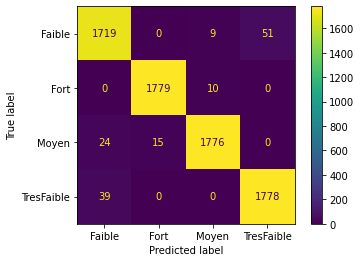

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import plot_confusion_matrix

arbreDecision = DecisionTreeClassifier()
arbreDecision.fit(X_train,y_train)

plot_confusion_matrix(arbreDecision, X_test, y_test) 

In [17]:
from sklearn.metrics import f1_score
predictions = arbreDecision.predict(X_test)
f1_score(y_test, predictions, average='macro')

0.9794326699007425

In [83]:
#Sauvegarde du modèle
import pickle
pickle.dump(arbreDecision, open("arbreDecision.sav", 'wb'))

### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)

RandomForestClassifier()

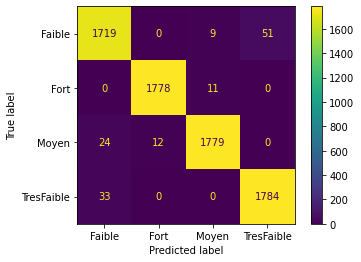

In [79]:
plot_confusion_matrix(randomForest, X_test, y_test)

In [80]:
from sklearn.metrics import f1_score
predictions = randomForest.predict(X_test)
f1_score(y_test, predictions, average='macro')

0.9805414600377862

In [84]:
#Sauvegarde du modèle
import pickle
pickle.dump(randomForest, open("randomForest.sav", 'wb'))

## Reseau de neurones

In [21]:

#On reprend les données avant le découpage train/test utilisé par les autres
#algorithmes
datas_ReseauxNeurones = df.copy()


#Selection des caractéristiques explicatives et de la caractéristique expliquée
Y = datas_ReseauxNeurones["Categorie"]
datas_ReseauxNeurones = datas_ReseauxNeurones.drop(columns=["Categorie","ForceANSSI","MotDePasse"])
X = datas_ReseauxNeurones

#On normalise les données.
#A titre pédagogique vous pouvez passer cette étape est constater son importance
#sur la mise en oeuvre des réseaux de neurones
from sklearn.preprocessing import MinMaxScaler
outilNormalisation = MinMaxScaler()
X_normalise = pnd.DataFrame(outilNormalisation.fit_transform(X))


#Dummies variables
y_dummies = pnd.get_dummies(Y)
y_dummies

,Faible,Fort,Moyen,TresFaible
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
23995,0,0,0,1
23996,0,0,0,1
23997,0,0,0,1
23998,0,0,0,1


In [28]:
#Dummies variables
y_dummies = pnd.get_dummies(Y)
y_dummies

,Faible,Fort,Moyen,TresFaible
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
23995,0,0,0,1
23996,0,0,0,1
23997,0,0,0,1
23998,0,0,0,1


In [26]:
#On mémorise les catégories encodées (l'ordre peut changer à chaque execution du note book)
categories = y_dummies.columns.values
print(categories)

['Faible' 'Fort' 'Moyen' 'TresFaible']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_normalise,y_dummies,test_size=0.30,random_state=42)

In [32]:
#Creation d'un réseau de neurones
from keras.models import Sequential
from keras import models, layers
import keras

keras_model = keras.Sequential()

#6 Neurones d'entrées correspondants aux caractéristiques
keras_model.add(keras.layers.Input((6,)))

#Une couche cachée de 4 neurons avec une fonction d'activation de type Relu
keras_model.add(keras.layers.Dense(4, activation='relu', use_bias=True))

#Une couche de sortie composée de 4 neurones (1 par catégorie de mot de passe)
#Une fonction d'activation de type softmax
keras_model.add(keras.layers.Dense(4, activation='softmax'))

#Compilation du réseau avec une fonction de perte de type categorical_crossentropy 
#car nous avons plus de 2 classes
#L'optimiseur est une descente de gradient stochastique.
keras_model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

#Apprentissage
historique = keras_model.fit(X_train, y_train,epochs=10, batch_size=2, verbose=1,validation_split=.3)

Epoch 1/10
5880/5880 [==============================] - 11s 2ms/step - loss: 1.0380 - accuracy: 0.5410 - val_loss: 0.7131 - val_accuracy: 0.8232
Epoch 2/10
5880/5880 [==============================] - 16s 3ms/step - loss: 0.5806 - accuracy: 0.8699 - val_loss: 0.4882 - val_accuracy: 0.9121
Epoch 3/10
5880/5880 [==============================] - 12s 2ms/step - loss: 0.4260 - accuracy: 0.9087 - val_loss: 0.3801 - val_accuracy: 0.9109
Epoch 4/10
5880/5880 [==============================] - 15s 2ms/step - loss: 0.3470 - accuracy: 0.9211 - val_loss: 0.3237 - val_accuracy: 0.9173
Epoch 5/10
5880/5880 [==============================] - 15s 3ms/step - loss: 0.3010 - accuracy: 0.9242 - val_loss: 0.2881 - val_accuracy: 0.9224
Epoch 6/10
5880/5880 [==============================] - 10s 2ms/step - loss: 0.2714 - accuracy: 0.9271 - val_loss: 0.2693 - val_accuracy: 0.9220
Epoch 7/10
5880/5880 [==============================] - 10s 2ms/step - loss: 0.2498 - accuracy: 0.9291 - val_loss: 0.2476 - val_ac

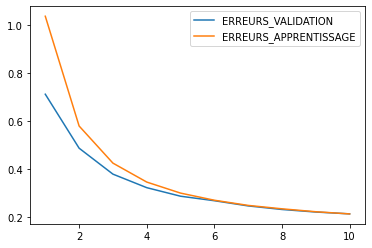

In [33]:
#En fonction du jeu de données il se peut que l'on rencontre un sur-apprentissage.
#Il convient donc
# - D'executer l'apprentissage plusieurs fois
# - D'adapter le nombre d'epoque / architecture le cas échéant.

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, 11), historique.history["val_loss"], label="ERREURS_VALIDATION")
plt.plot(np.arange(1, 11), historique.history["loss"], label="ERREURS_APPRENTISSAGE")
plt.legend()
plt.show()

In [34]:

predictions = keras_model.predict(X_test)

#Conversion des predictions en 1/0 pour effectuer le F1 Score
for i in range (0,len(predictions)):
  prediction = predictions[i]
  valMax = np.max(prediction)
  for j in range(0,len(prediction)):
    if(prediction[j]==valMax):
      prediction[j]=1
    else:
      prediction[j]=0
  predictions[i] = prediction



[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
       Faible  Fort  Moyen  TresFaible
3111        1     0      0           0
18679       0     0      0           1
17472       0     0      1           0
21451       0     0      0           1
20800       0     0      0           1
...       ...   ...    ...         ...
18801       0     0      0           1
542         1     0      0           0
22332       0     0      0           1
7958        0     1      0           0
5176        1     0      0           0

[7200 rows x 4 columns]


In [ ]:
f1_score(y_test, predictions, average='macro')

0.9427843656196556

In [36]:
#Sauvegarde des datasets
X_train.to_csv("XTrainRN.csv",index=False)
y_train.to_csv("YTrainRN.csv",index=False)
X_test.to_csv("XTestRN.csv",index=False)
y_test.to_csv("YTestRN.csv",index=False)

In [44]:
#Sauvegarde du modele
keras_model.save("reseau_neurones.h5")

In [45]:
#Sauvegarde de l'outil de normalisation
from pickle import dump
dump(outilNormalisation, open('outilNormalisation.pkl', 'wb'))

In [58]:
#Sauvegarde de l'ordre des categories de l'encodage
df_cat = pnd.DataFrame(categories)
df_cat.head()
df_cat.to_csv("ordre_categories.csv",index=False)

## Utilisation des modèles

In [69]:
#Mots de passes
mdp_tresfaible = "ECAB2E0B85"
mdp_faible = "B.ytosvmhw"
mdp_moyen = "7u8kq7OIhGUjLVJx"
mdp_fort = "u1xc=;£uls16U}$f?2%Tw;W9U26Y<B"

listeMDP = [[mdp_tresfaible,"TresFaible"],[mdp_faible,"Faible"],[mdp_moyen,"Moyen"],[mdp_fort,"Fort"]]


In [39]:
def preparerMotDePasse(mdp):
  chiffres = [0,1,2,3,4,5,6,7,8,9]
  lettresMAJ = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
  lettresMIN = ["a","b","c","s","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
  symboles1 = ["!","#","$","%","?","*","_",";"]
  symboles2 = ["&","{","(","-","@",")","=","}","]","/","|","[","§","µ",".",";","<",">","£","+"]

  nbMin = 0
  nbMaj =0
  nbChiffres = 0
  nbSymboles_1 =0
  nbSymboles_2 = 0
  for l in mdp:
    if l in lettresMIN:
      nbMin+=1
    if l in lettresMAJ:
      nbMaj+=1
    if l in str(chiffres):
      nbChiffres+=1
    if l in symboles1:
      nbSymboles_1+=1
    if l in symboles2:
      nbSymboles_2+=1

  longueur = len(mdp)
  return [nbMin,nbMaj,nbChiffres,nbSymboles_1,nbSymboles_2,longueur]



### Arbre de décision

In [85]:
#Chargement du modèle
arbreDecision = pickle.load(open("arbreDecision.sav", 'rb'))

In [91]:
#Predictions
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable
resultats = PrettyTable()

resultats.field_names = ["MDP", "Attendu", "Predit"]

for mdp in listeMDP:
  preparation = preparerMotDePasse(mdp[0])
  classification = arbreDecision.predict(np.array(preparation).reshape(1,-1))
  resultats.add_row([mdp[0], mdp[1],classification[0]])

print(resultats)

+--------------------------------+------------+------------+
|              MDP               |  Attendu   |   Predit   |
+--------------------------------+------------+------------+
|           ECAB2E0B85           | TresFaible | TresFaible |
|           B.ytosvmhw           |   Faible   |   Faible   |
|        7u8kq7OIhGUjLVJx        |   Moyen    |   Moyen    |
| u1xc=;£uls16U}$f?2%Tw;W9U26Y<B |    Fort    |    Fort    |
+--------------------------------+------------+------------+


### Random Forest

In [87]:
#Chargement du modèle
randomForest = pickle.load(open("randomForest.sav", 'rb'))

In [92]:
#Predictions
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable
resultats = PrettyTable()

resultats.field_names = ["MDP", "Attendu", "Predit"]

for mdp in listeMDP:
  preparation = preparerMotDePasse(mdp[0])
  classification = randomForest.predict(np.array(preparation).reshape(1,-1))
  resultats.add_row([mdp[0], mdp[1],classification[0]])

print(resultats)


+--------------------------------+------------+------------+
|              MDP               |  Attendu   |   Predit   |
+--------------------------------+------------+------------+
|           ECAB2E0B85           | TresFaible | TresFaible |
|           B.ytosvmhw           |   Faible   |   Faible   |
|        7u8kq7OIhGUjLVJx        |   Moyen    |   Moyen    |
| u1xc=;£uls16U}$f?2%Tw;W9U26Y<B |    Fort    |    Fort    |
+--------------------------------+------------+------------+


### Réseau de neurones

In [46]:
#Chargement de l'outil de normalisation
from pickle import load
outilNormalisation = load(open('outilNormalisation.pkl', 'rb'))

In [51]:
#Chargement du modèle
from tensorflow import keras
model = keras.models.load_model('reseau.md5')

In [63]:
#Chargement de l'ordre des categories telles qu'elles ont été encodées
#(Cet ordre dépend de l'ordre des données d'apprentissage)
cat = pnd.read_csv("ordre_categories.csv")
cat.head()
categories = []
for index, row in cat.iterrows():
  categories.append(row[0])


In [72]:
#Predictions
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable
resultats = PrettyTable()

resultats.field_names = ["MDP", "Attendu", "Predit"]

for mdp in listeMDP:
  preparation = preparerMotDePasse(mdp[0])
  normalisation = outilNormalisation.transform(np.array(preparation).reshape(1,-1))
  classification = model.predict(normalisation.reshape(1,-1))
  resultats.add_row([mdp[0], mdp[1],categories[np.argmax(classification)]])

print(resultats)


+--------------------------------+------------+------------+
|              MDP               |  Attendu   |   Predit   |
+--------------------------------+------------+------------+
|           ECAB2E0B85           | TresFaible | TresFaible |
|           B.ytosvmhw           |   Faible   |   Faible   |
|        7u8kq7OIhGUjLVJx        |   Moyen    |   Moyen    |
| u1xc=;£uls16U}$f?2%Tw;W9U26Y<B |    Fort    |    Fort    |
+--------------------------------+------------+------------+
